In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DeepLearning/StockPredict/N225_14_24.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-20,15724.139648,15727.259766,15574.230469,15641.679688,15641.679688,142200000.0
1,2014-01-21,15710.889648,15894.679688,15705.839844,15795.959961,15795.959961,154300000.0
2,2014-01-22,15749.009766,15870.530273,15631.410156,15820.959961,15820.959961,185300000.0
3,2014-01-23,15900.629883,15958.580078,15690.450195,15695.889648,15695.889648,206900000.0
4,2014-01-24,15473.570313,15485.019531,15288.320313,15391.559570,15391.559570,221000000.0
...,...,...,...,...,...,...,...
2461,2024-01-12,35601.648438,35839.648438,35362.238281,35577.109375,35577.109375,129200000.0
2462,2024-01-15,35634.121094,36008.230469,35544.320313,35901.789063,35901.789063,105700000.0
2463,2024-01-16,35909.199219,35955.679688,35587.531250,35619.179688,35619.179688,103400000.0
2464,2024-01-17,35850.179688,36239.218750,35476.519531,35477.750000,35477.750000,139500000.0


In [ ]:
data.reset_index(drop=True, inplace=True)
data.fillna(method='ffill', inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-20,15724.139648,15727.259766,15574.230469,15641.679688,15641.679688,142200000.0
1,2014-01-21,15710.889648,15894.679688,15705.839844,15795.959961,15795.959961,154300000.0
2,2014-01-22,15749.009766,15870.530273,15631.410156,15820.959961,15820.959961,185300000.0
3,2014-01-23,15900.629883,15958.580078,15690.450195,15695.889648,15695.889648,206900000.0
4,2014-01-24,15473.570313,15485.019531,15288.320313,15391.559570,15391.559570,221000000.0
...,...,...,...,...,...,...,...
2461,2024-01-12,35601.648438,35839.648438,35362.238281,35577.109375,35577.109375,129200000.0
2462,2024-01-15,35634.121094,36008.230469,35544.320313,35901.789063,35901.789063,105700000.0
2463,2024-01-16,35909.199219,35955.679688,35587.531250,35619.179688,35619.179688,103400000.0
2464,2024-01-17,35850.179688,36239.218750,35476.519531,35477.750000,35477.750000,139500000.0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2014-01-20
1      2014-01-21
2      2014-01-22
3      2014-01-23
4      2014-01-24
          ...    
2461   2024-01-12
2462   2024-01-15
2463   2024-01-16
2464   2024-01-17
2465   2024-01-18
Name: Date, Length: 2466, dtype: datetime64[ns]

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.index = data.pop('Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-20,15724.139648,15727.259766,15574.230469,15641.679688,15641.679688,142200000.0
2014-01-21,15710.889648,15894.679688,15705.839844,15795.959961,15795.959961,154300000.0
2014-01-22,15749.009766,15870.530273,15631.410156,15820.959961,15820.959961,185300000.0
2014-01-23,15900.629883,15958.580078,15690.450195,15695.889648,15695.889648,206900000.0
2014-01-24,15473.570313,15485.019531,15288.320313,15391.559570,15391.559570,221000000.0


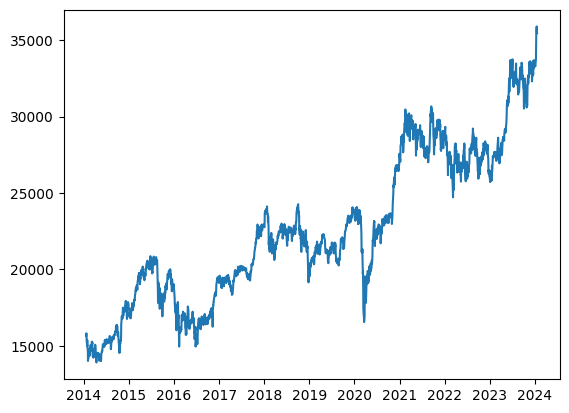

In [ ]:
plt.plot(data.index, data['Close'])

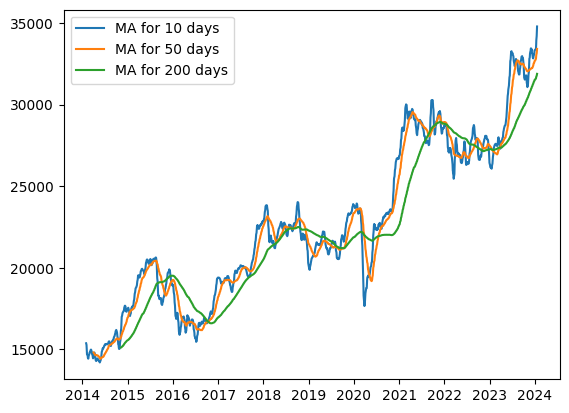

In [ ]:
ma_day = [10, 50, 200]
for ma in ma_day:
      column_name = f"MA for {ma} days"
      data[column_name] = data['Close'].rolling(ma).mean()
      plt.plot(data.index, data[column_name], label=column_name)
plt.legend()
plt.show()


In [ ]:
target = data['Close']
df = pd.DataFrame(target)
df.head()

,Close
Date,
2014-01-20,15641.679688
2014-01-21,15795.959961
2014-01-22,15820.959961
2014-01-23,15695.889648
2014-01-24,15391.559570


In [ ]:
df.shape

(2466, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
sc_data = scaler.fit_transform(np.array(df).reshape(-1, 1))

print(sc_data[0: 5])
sc_data.shape

[[0.07873539]
 [0.0857508 ]
 [0.0868876 ]
 [0.08120042]
 [0.06736197]]


(2466, 1)

In [ ]:
train_size = int(len(df)* 0.85)
test_size = len(df) - train_size

train_size, test_size

(2096, 370)

In [ ]:
date_train = int(len(df.index)* 0.85)
date_test = len(df.index) - date_train

In [ ]:
train_data = sc_data[ :train_size, 0: 1]

test_data = sc_data[train_size-3: , 0: 1]

train_data.shape, test_data.shape

((2096, 1), (373, 1))

In [ ]:
tr_Xs = []
tr_y = []
tr_date = []

for i in range(3, len(train_data)):
    tr_Xs.append(train_data[i-3: i,0 ])
    tr_y.append(train_data[i, 0])
    tr_date.append(df.index[i])

# convert Xs, y to arrays
tr_Xs, tr_y = np.array(tr_Xs), np.array(tr_y)

tr_Xs = np.reshape(tr_Xs, (tr_Xs.shape[0], tr_Xs.shape[1], 1))
tr_date = np.array(tr_date)

tr_date.shape, tr_Xs.shape, tr_y.shape

((2093,), (2093, 3, 1), (2093,))

In [ ]:
ts_Xs = []
ts_y = []
ts_date = []

for i in range(3, len(test_data)):
    ts_Xs.append(test_data[i-3: i, 0])
    ts_y.append(test_data[i, 0])
    ts_date.append(df.index[len(train_data)+i-3])

ts_Xs, ts_y = np.array(ts_Xs), np.array(ts_y)

ts_Xs = np.reshape(ts_Xs, (ts_Xs.shape[0], ts_Xs.shape[1], 1))
ts_date = np.array(ts_date)

ts_date.shape, ts_Xs.shape, ts_y.shape

((370,), (370, 3, 1), (370,))

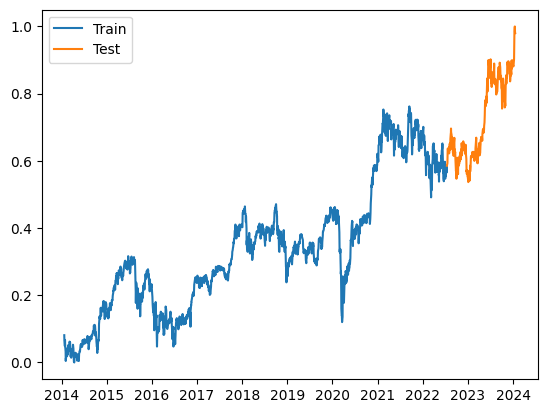

In [ ]:
plt.plot(tr_date, tr_y)
plt.plot(ts_date, ts_y)
plt.legend(['Train', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

In [ ]:
model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rs = model.fit(tr_Xs, tr_y, epochs=100, batch_size=80)

Epoch 1/100
27/27 [==============================] - 5s 11ms/step - loss: 0.0775 - mae: 0.2204
Epoch 2/100
27/27 [==============================] - 0s 9ms/step - loss: 0.0087 - mae: 0.0751
Epoch 3/100
27/27 [==============================] - 0s 10ms/step - loss: 7.2072e-04 - mae: 0.0201
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 2.7367e-04 - mae: 0.0122
Epoch 5/100
27/27 [==============================] - 0s 9ms/step - loss: 2.4157e-04 - mae: 0.0113
Epoch 6/100
27/27 [==============================] - 0s 9ms/step - loss: 2.4698e-04 - mae: 0.0114
Epoch 7/100
27/27 [==============================] - 0s 9ms/step - loss: 2.3501e-04 - mae: 0.0110
Epoch 8/100
27/27 [==============================] - 0s 10ms/step - loss: 2.3551e-04 - mae: 0.0110
Epoch 9/100
27/27 [==============================] - 0s 10ms/step - loss: 2.3301e-04 - mae: 0.0110
Epoch 10/100
27/27 [==============================] - 0s 10ms/step - loss: 2.3288e-04 - mae: 0.0109
Epoch 11/100
27/27 [=

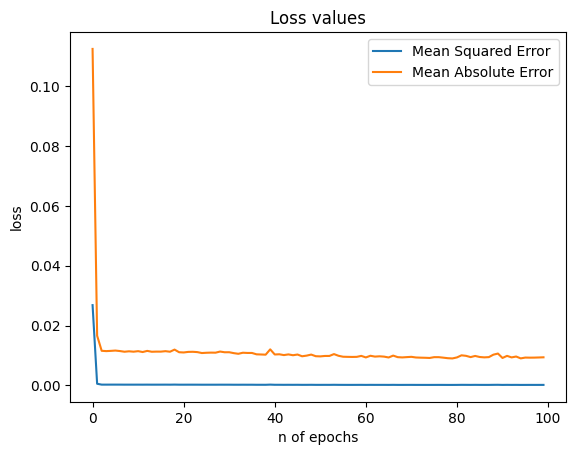

In [ ]:
plt.plot(rs.history["loss"])
plt.plot(rs.history["mae"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Loss values")
plt.xlabel("n of epochs")
plt.ylabel("loss")
plt.show()

In [ ]:
p = model.predict(ts_Xs)
print(p[0: 5])


In [ ]:
ps = scaler.inverse_transform(p)
print(ps[0:5])
ps.shape

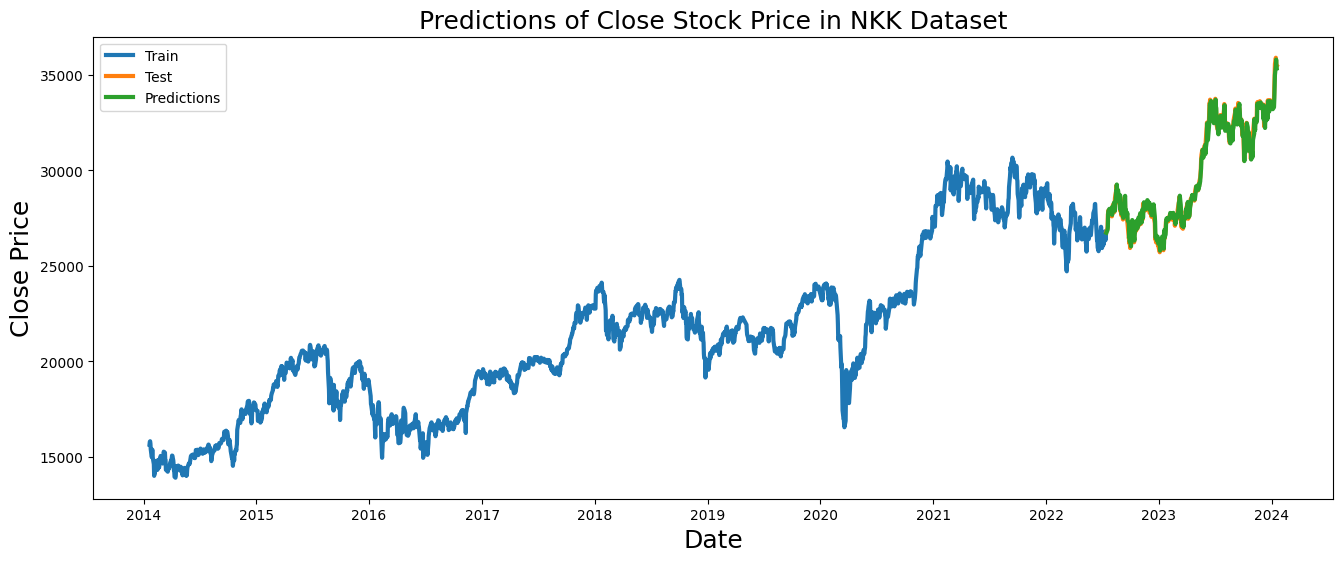

In [ ]:
train = df.iloc[ :train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = ps

plt.figure(figsize= (16, 6))
plt.title('Predictions of Close Stock Price in NKK Dataset', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [ ]:
from datetime import timedelta

In [ ]:
def insert_end(Xin, new_input):
    timestep = 3
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [ ]:
ts_Xs.shape

(370, 3, 1)

In [ ]:
future = 120
forcast = []
Xin = ts_Xs[-1 :, :, :] #SLICING INPUT (Xin) like tx_Xs -->> 3Dims
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0])
    print(forcast)
    Xin = insert_end(Xin, out[0, 0])
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i)) #Append generated datetime in 'time' list

1/1 [==============================] - 0s 28ms/step
[0.97483236]
1/1 [==============================] - 0s 27ms/step
[0.97483236, 0.9691852]
1/1 [==============================] - 0s 26ms/step
[0.97483236, 0.9691852, 0.96367514]
1/1 [==============================] - 0s 26ms/step
[0.97483236, 0.9691852, 0.96367514, 0.95828867]
1/1 [==============================] - 0s 26ms/step
[0.97483236, 0.9691852, 0.96367514, 0.95828867, 0.95302147]
1/1 [==============================] - 0s 26ms/step
[0.97483236, 0.9691852, 0.96367514, 0.95828867, 0.95302147, 0.9478715]
1/1 [==============================] - 0s 30ms/step
[0.97483236, 0.9691852, 0.96367514, 0.95828867, 0.95302147, 0.9478715, 0.9428369]
1/1 [==============================] - 0s 31ms/step
[0.97483236, 0.9691852, 0.96367514, 0.95828867, 0.95302147, 0.9478715, 0.9428369, 0.9379155]
1/1 [==============================] - 0s 25ms/step
[0.97483236, 0.9691852, 0.96367514, 0.95828867, 0.95302147, 0.9478715, 0.9428369, 0.9379155, 0.93310547]


In [ ]:
later30 = np.array(forcast)
later30 = np.array(forcast).reshape(-1, 1)
later30 = scaler.inverse_transform(later30)

later30 = pd.DataFrame(later30)


datetime = pd.DataFrame(time)

nextmonth = pd.concat([datetime, later30], axis = 1)
nextmonth.columns = 'Datetime', 'Close price thirty days later'

nextmonth

In [ ]:
later30

,0
0,35348.312500
1,35224.121094
2,35102.945312
3,34984.488281
4,34868.656250
...,...
115,30579.101562
116,30573.226562
117,30567.517578
118,30561.966797


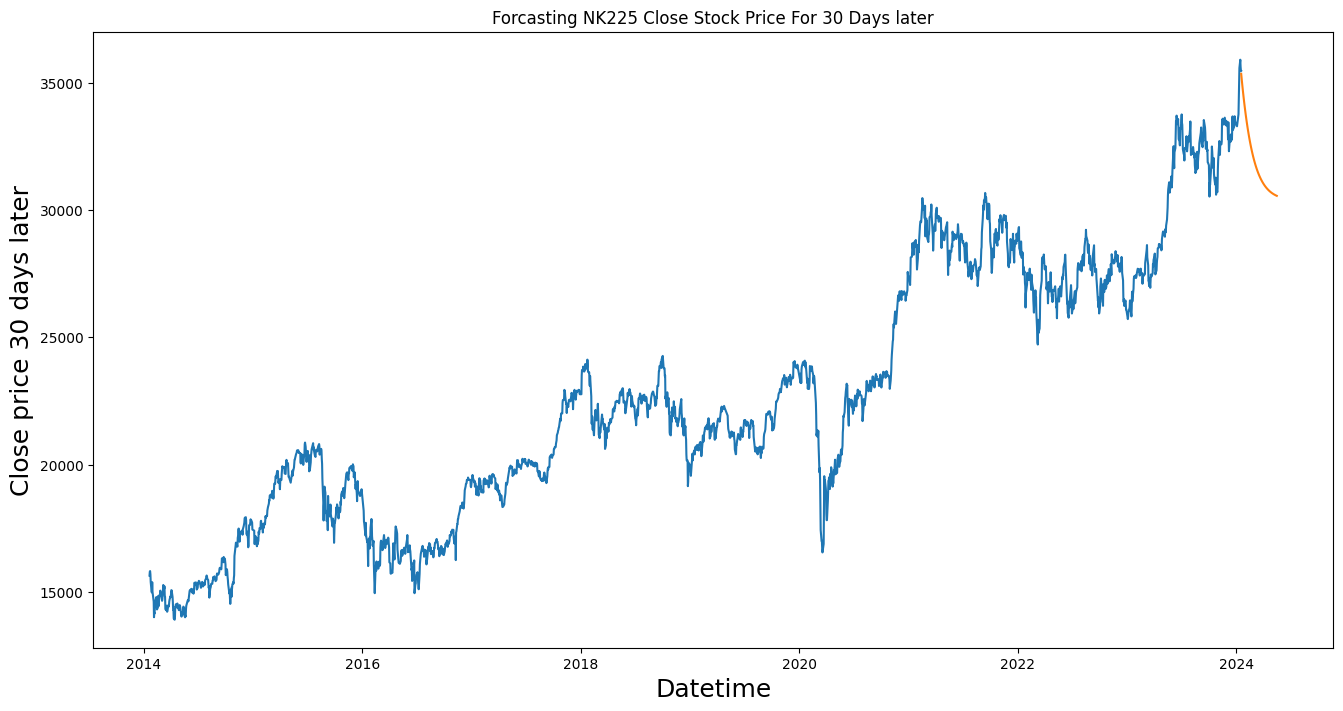

In [ ]:
plt.figure(figsize=(16, 8))
plt.title('Forcasting NK225 Close Stock Price For 30 Days later')
plt.xlabel('Datetime', fontsize=18)
plt.ylabel('Close price 30 days later' ,fontsize=18)
plt.plot(df['Close'])
plt.plot(nextmonth.set_index('Datetime')[['Close price thirty days later']])